In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets

C:\Users\Srivalli Sana\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Srivalli Sana\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\Srivalli Sana\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
path = "D://Medicinal plant dataset"
no_epochs = 8

In [3]:
labels = []
for lab in tqdm(os.listdir(path)):
    labels.append(lab)
print(f'No of lables found = {len(labels)}')
no_classes = len(labels)

100%|██████████| 40/40 [00:00<?, ?it/s]

No of lables found = 40


In [4]:
print(labels)

['Aloevera', 'Amla', 'Amruta_Balli', 'Arali', 'Ashoka', 'Ashwagandha', 'Avacado', 'Bamboo', 'Basale', 'Betel', 'Betel_Nut', 'Brahmi', 'Castor', 'Curry_Leaf', 'Doddapatre', 'Ekka', 'Ganike', 'Gauva', 'Geranium', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jasmine', 'Lemon', 'Lemon_grass', 'Mango', 'Mint', 'Nagadali', 'Neem', 'Nithyapushpa', 'Nooni', 'Pappaya', 'Pepper', 'Pomegranate', 'Raktachandini', 'Rose', 'Sapota', 'Tulasi', 'Wood_sorel']


In [5]:
X_train = []
y_train = []
image_size = 224

device = "/GPU:0" if tf.config.list_physical_devices('GPU') else "/CPU:0"

with tf.device(device):
    for i in labels:
        folderPath = path + '/' + i#os.path.join(path,i)
        print(f'{labels.index(i)}: {folderPath}')
        for j in tqdm(os.listdir(folderPath)):
            img = cv2.imread(folderPath + '/' + j)#os.path.join(folderPath,j))
            #print(folderPath + '\\' + j)
            img = cv2.resize(img,(image_size, image_size))
            X_train.append(img)
            y_train.append(i)

0: D://Medicinal plant dataset/Aloevera


100%|██████████| 164/164 [00:01<00:00, 111.86it/s]


1: D://Medicinal plant dataset/Amla


100%|██████████| 146/146 [00:01<00:00, 125.74it/s]


2: D://Medicinal plant dataset/Amruta_Balli


100%|██████████| 146/146 [00:01<00:00, 116.61it/s]


3: D://Medicinal plant dataset/Arali


100%|██████████| 146/146 [00:01<00:00, 133.24it/s]


4: D://Medicinal plant dataset/Ashoka


100%|██████████| 146/146 [00:01<00:00, 115.68it/s]


5: D://Medicinal plant dataset/Ashwagandha


100%|██████████| 146/146 [00:01<00:00, 111.12it/s]


6: D://Medicinal plant dataset/Avacado


100%|██████████| 146/146 [00:01<00:00, 121.66it/s]


7: D://Medicinal plant dataset/Bamboo


100%|██████████| 146/146 [00:01<00:00, 127.42it/s]


8: D://Medicinal plant dataset/Basale


100%|██████████| 146/146 [00:01<00:00, 112.96it/s]


9: D://Medicinal plant dataset/Betel


100%|██████████| 151/151 [00:01<00:00, 117.39it/s]


10: D://Medicinal plant dataset/Betel_Nut


100%|██████████| 146/146 [00:01<00:00, 125.22it/s]


11: D://Medicinal plant dataset/Brahmi


100%|██████████| 146/146 [00:01<00:00, 114.73it/s]


12: D://Medicinal plant dataset/Castor


100%|██████████| 160/160 [00:01<00:00, 106.24it/s]


13: D://Medicinal plant dataset/Curry_Leaf


100%|██████████| 146/146 [00:01<00:00, 114.39it/s]


14: D://Medicinal plant dataset/Doddapatre


100%|██████████| 146/146 [00:01<00:00, 101.96it/s]


15: D://Medicinal plant dataset/Ekka


100%|██████████| 146/146 [00:01<00:00, 124.56it/s]


16: D://Medicinal plant dataset/Ganike


100%|██████████| 115/115 [00:00<00:00, 138.91it/s]


17: D://Medicinal plant dataset/Gauva


100%|██████████| 146/146 [00:01<00:00, 123.46it/s]


18: D://Medicinal plant dataset/Geranium


100%|██████████| 146/146 [00:01<00:00, 120.32it/s]


19: D://Medicinal plant dataset/Henna


100%|██████████| 150/150 [00:01<00:00, 110.61it/s]


20: D://Medicinal plant dataset/Hibiscus


100%|██████████| 165/165 [00:01<00:00, 110.22it/s]


21: D://Medicinal plant dataset/Honge


100%|██████████| 146/146 [00:01<00:00, 121.25it/s]


22: D://Medicinal plant dataset/Insulin


100%|██████████| 146/146 [00:01<00:00, 102.87it/s]


23: D://Medicinal plant dataset/Jasmine


100%|██████████| 187/187 [00:01<00:00, 109.86it/s]


24: D://Medicinal plant dataset/Lemon


100%|██████████| 146/146 [00:01<00:00, 113.13it/s]


25: D://Medicinal plant dataset/Lemon_grass


100%|██████████| 146/146 [00:01<00:00, 114.31it/s]


26: D://Medicinal plant dataset/Mango


100%|██████████| 146/146 [00:01<00:00, 112.13it/s]


27: D://Medicinal plant dataset/Mint


100%|██████████| 153/153 [00:01<00:00, 115.38it/s]


28: D://Medicinal plant dataset/Nagadali


100%|██████████| 152/152 [00:01<00:00, 131.93it/s]


29: D://Medicinal plant dataset/Neem


100%|██████████| 146/146 [00:01<00:00, 112.91it/s]


30: D://Medicinal plant dataset/Nithyapushpa


100%|██████████| 146/146 [00:01<00:00, 104.26it/s]


31: D://Medicinal plant dataset/Nooni


100%|██████████| 146/146 [00:01<00:00, 106.78it/s]


32: D://Medicinal plant dataset/Pappaya


100%|██████████| 146/146 [00:01<00:00, 109.61it/s]


33: D://Medicinal plant dataset/Pepper


100%|██████████| 146/146 [00:01<00:00, 99.05it/s]


34: D://Medicinal plant dataset/Pomegranate


100%|██████████| 146/146 [00:01<00:00, 111.31it/s]


35: D://Medicinal plant dataset/Raktachandini


100%|██████████| 146/146 [00:01<00:00, 102.17it/s]


36: D://Medicinal plant dataset/Rose


100%|██████████| 168/168 [00:01<00:00, 109.52it/s]


37: D://Medicinal plant dataset/Sapota


100%|██████████| 146/146 [00:01<00:00, 111.29it/s]


38: D://Medicinal plant dataset/Tulasi


100%|██████████| 146/146 [00:01<00:00, 114.48it/s]


39: D://Medicinal plant dataset/Wood_sorel


100%|██████████| 146/146 [00:01<00:00, 99.45it/s]


In [6]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [7]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [8]:
X_train.shape

(5945, 224, 224, 3)

In [9]:
X_train,X_Val,y_train,y_val = train_test_split(X_train,y_train, test_size=0.2,random_state=101)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.2,random_state=101)

In [12]:
# Define the device
device = "/GPU:0" if tf.config.list_physical_devices('GPU') else "/CPU:0"

# Example of running operations on the specified device
with tf.device(device):
    effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
    
    model = effnet.output
    model = tf.keras.layers.GlobalAveragePooling2D()(model)
    model = tf.keras.layers.Dropout(rate=0.5)(model)
    model = tf.keras.layers.Dense(len(labels),activation='softmax')(model)
    model = tf.keras.models.Model(inputs=effnet.input, outputs = model)
    
    model.summary()
    
    model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])
    
    tensorboard = TensorBoard(log_dir = 'logs')
    checkpoint = ModelCheckpoint("planteffnet.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                                  mode='auto',verbose=1)
    
    history = model.fit(X_train,y_train,validation_split=0.1, epochs = no_epochs, verbose=1, batch_size=10,
                       callbacks=[tensorboard,checkpoint,reduce_lr])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,100,811 (15.64 MB)

 Trainable params: 4,058,788 (15.48 MB)

 Non-trainable params: 42,023 (164.16 KB)

Epoch 1/8
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4536 - loss: 2.1404
Epoch 1: val_accuracy improved from -inf to 0.79790, saving model to planteffnet.keras
343/343 ━━━━━━━━━━━━━━━━━━━━ 490s 1s/step - accuracy: 0.4542 - loss: 2.1382 - val_accuracy: 0.7979 - val_loss: 0.7422 - learning_rate: 0.0010
Epoch 2/8
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8711 - loss: 0.4501
Epoch 2: val_accuracy improved from 0.79790 to 0.87664, saving model to planteffnet.keras
343/343 ━━━━━━━━━━━━━━━━━━━━ 446s 1s/step - accuracy: 0.8710 - loss: 0.4501 - val_accuracy: 0.8766 - val_loss: 0.3857 - learning_rate: 0.0010
Epoch 3/8
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9106 - loss: 0.2977
Epoch 3: val_accuracy improved from 0.87664 to 0.93701, saving model to planteffnet.keras
343/343 ━━━━━━━━━━━━━━━━━━━━ 447s 1s/step - accuracy: 0.9106 - loss: 0.2976 - val_accuracy: 0.9370 - val_loss: 0.2618 - learning_rate: 0.0010
Epoch 4/8
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc

In [11]:
y_train_new = []
count = 0
for i in y_train:
    y_train_new.append(labels.index(i))
    count += 1
    if count > 5:
        print(f'\n')
        count = 0
    print(f'{i}->{labels.index(i)}, ')
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Betel->9, 
Pepper->33, 
Tulasi->38, 
Nagadali->28, 
Ashoka->4, 


Wood_sorel->39, 
Pepper->33, 
Ashoka->4, 
Tulasi->38, 
Pappaya->32, 
Brahmi->11, 


Sapota->37, 
Hibiscus->20, 
Basale->8, 
Ashoka->4, 
Tulasi->38, 
Amla->1, 


Curry_Leaf->13, 
Lemon_grass->25, 
Lemon_grass->25, 
Pomegranate->34, 
Wood_sorel->39, 
Gauva->17, 


Basale->8, 
Castor->12, 
Lemon->24, 
Jasmine->23, 
Geranium->18, 
Amla->1, 


Mango->26, 
Henna->19, 
Avacado->6, 
Jasmine->23, 
Tulasi->38, 
Geranium->18, 


Castor->12, 
Avacado->6, 
Rose->36, 
Avacado->6, 
Honge->21, 
Curry_Leaf->13, 


Lemon_grass->25, 
Mint->27, 
Tulasi->38, 
Arali->3, 
Basale->8, 
Mint->27, 


Neem->29, 
Raktachandini->35, 
Wood_sorel->39, 
Curry_Leaf->13, 
Aloevera->0, 
Raktachandini->35, 


Geranium->18, 
Ekka->15, 
Lemon_grass->25, 
Betel->9, 
Tulasi->38, 
Jasmine->23, 


Curry_Leaf->13, 
Basale->8, 
Jasmine->23, 
Nooni->31, 
Rose->36, 
Ashoka->4, 


Ashwagandha->5, 
Geranium->18, 
Pomegranate->34, 
Nithyapushpa->30, 
Pappaya->32, 
Ashwa

#, train_acc, val_acc, train_loss, val_loss
0, 0.6424189209938049, 0.7979002594947815, 1.3635751008987427, 0.7422349452972412
1, 0.8676599264144897, 0.8766404390335083, 0.45530471205711365, 0.38565143942832947
2, 0.915278971195221, 0.9370078444480896, 0.28566208481788635, 0.2617599666118622
3, 0.9298860430717468, 0.9212598204612732, 0.2269328534603119, 0.2735000252723694
4, 0.9389424324035645, 0.9475065469741821, 0.19250668585300446, 0.18009009957313538
5, 0.9684487581253052, 0.9422572255134583, 0.11069890856742859, 0.26595643162727356
6, 0.9535495042800903, 0.9370078444480896, 0.1562497913837433, 0.2787252366542816
7, 0.9763365387916565, 0.9711285829544067, 0.08131619542837143, 0.08218015730381012


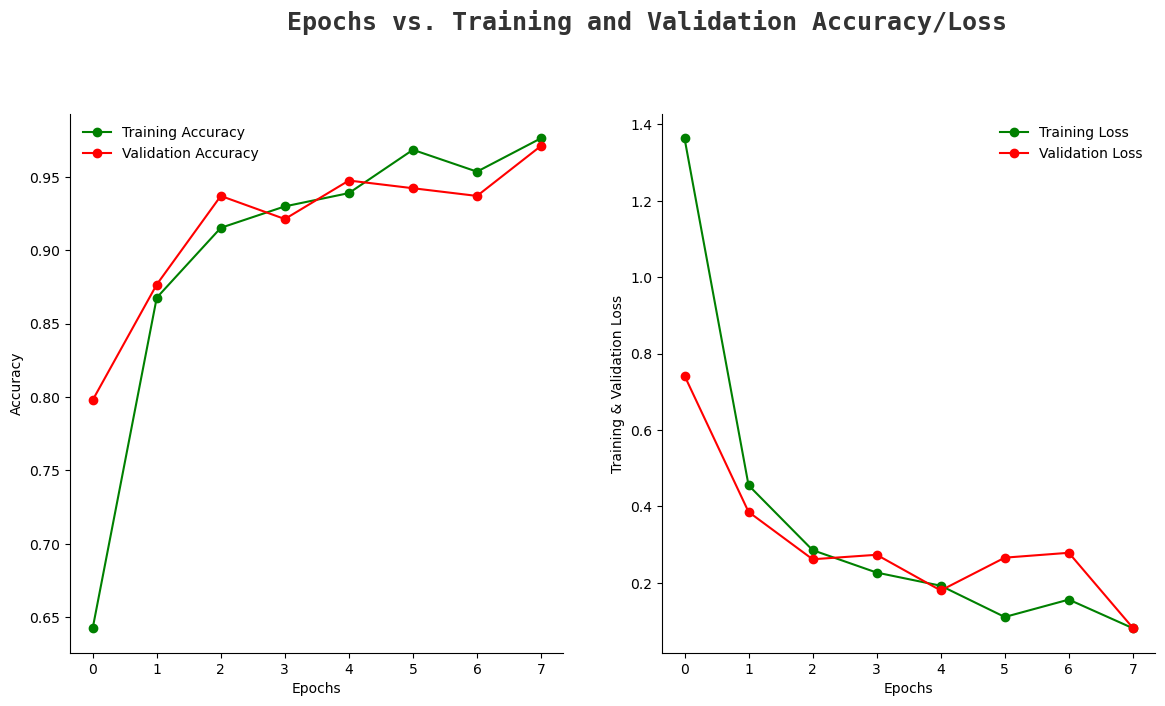

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have defined colors_green and colors_red
colors_green = ['green']  # Replace with your actual color definition
colors_red = ['red']      # Replace with your actual color definition

# Make sure the lists have the same length
epochs = [i for i in range(no_epochs)]
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

print(f'#, train_acc, val_acc, train_loss, val_loss')

for i in range(no_epochs):
    print(f'{i}, {train_acc[i]}, {val_acc[i]}, {train_loss[i]}, {val_loss[i]}')

# Modify the title text to use the color 'black' since colors_dark was not defined
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size=18, fontweight='bold',
         fontname='monospace', color='black', y=1, x=0.28, alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o', markerfacecolor=colors_green[0], color=colors_green[0],
           label='Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o', markerfacecolor=colors_red[0], color=colors_red[0],
           label='Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o', markerfacecolor=colors_green[0], color=colors_green[0],
           label='Training Loss')
ax[1].plot(epochs, val_loss, marker='o', markerfacecolor=colors_red[0], color=colors_red[0],
           label='Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

plt.show()


In [14]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras import Model

base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(image_size,image_size, 3))
vgg = base_model_vgg.output
vgg = GlobalAveragePooling2D()(vgg)
vgg = Dropout(0.2)(vgg)
predictions = Dense(len(labels), activation='sigmoid')(vgg)
VGGmodel = Model(inputs=base_model_vgg.input, outputs=predictions)

In [15]:
VGGmodel.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [16]:
tensorboard1 = TensorBoard(log_dir = 'logs')
checkpoint1 = ModelCheckpoint("./planteffnet.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr1 = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [18]:
device = "/CPU:0"
with tf.device(device):
    vgghistory = VGGmodel.fit(X_train,y_train,validation_split=0.1, epochs = no_epochs, verbose=1, batch_size=1
                              
                              0,
                       callbacks=[tensorboard,checkpoint,reduce_lr])


Epoch 1/8
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.0245 - loss: 3.6891
Epoch 1: val_accuracy did not improve from 0.97113
343/343 ━━━━━━━━━━━━━━━━━━━━ 2441s 7s/step - accuracy: 0.0245 - loss: 3.6891 - val_accuracy: 0.0131 - val_loss: 3.6900 - learning_rate: 0.0010
Epoch 2/8
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.0249 - loss: 3.6881
Epoch 2: val_accuracy did not improve from 0.97113
343/343 ━━━━━━━━━━━━━━━━━━━━ 2408s 7s/step - accuracy: 0.0249 - loss: 3.6881 - val_accuracy: 0.0236 - val_loss: 3.6907 - learning_rate: 0.0010
Epoch 3/8
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.0301 - loss: 3.6877
Epoch 3: val_accuracy did not improve from 0.97113
343/343 ━━━━━━━━━━━━━━━━━━━━ 2417s 7s/step - accuracy: 0.0301 - loss: 3.6877 - val_accuracy: 0.0236 - val_loss: 3.6913 - learning_rate: 0.0010
Epoch 4/8
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.0249 - loss: 3.6876
Epoch 4: val_accuracy did not improve from 0.97113

Epoch 4: ReduceLROnPlateau red

In [19]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 799ms/step


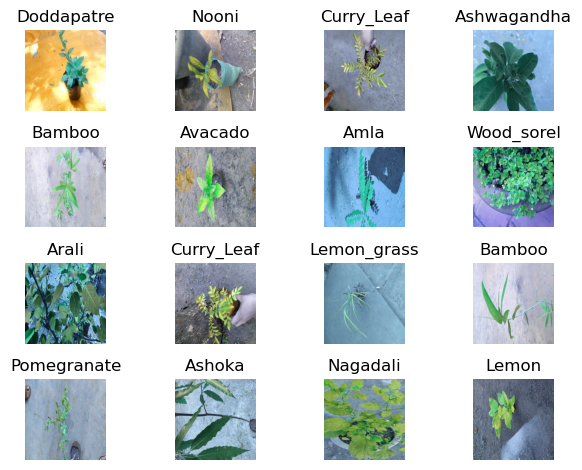

In [20]:
import matplotlib.pyplot as plt

# Get the predicted labels.
pred_lab = []
for p in pred:
    pred_lab.append(labels[p])

# Create a figure and a 4x4 grid of subplots.
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True)

# Iterate over the subplots and plot the predicted labels.
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(X_test[i*4+j])
        axs[i, j].set_title(pred_lab[i * 4 + j])
        axs[i, j].axis('off')

# Adjust the subplot layout.
fig.tight_layout() 

# Show the plot.
plt.show()

In [21]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       0.95      1.00      0.98        20
           3       0.90      1.00      0.95        18
           4       1.00      1.00      1.00        23
           5       1.00      0.96      0.98        25
           6       1.00      1.00      1.00        21
           7       1.00      0.97      0.98        32
           8       1.00      0.95      0.98        21
           9       0.96      1.00      0.98        22
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        23
          14       0.95      1.00      0.98        21
          15       0.97      1.00      0.98        31
          16       0.95      0.86      0.90        22
          17       1.00    

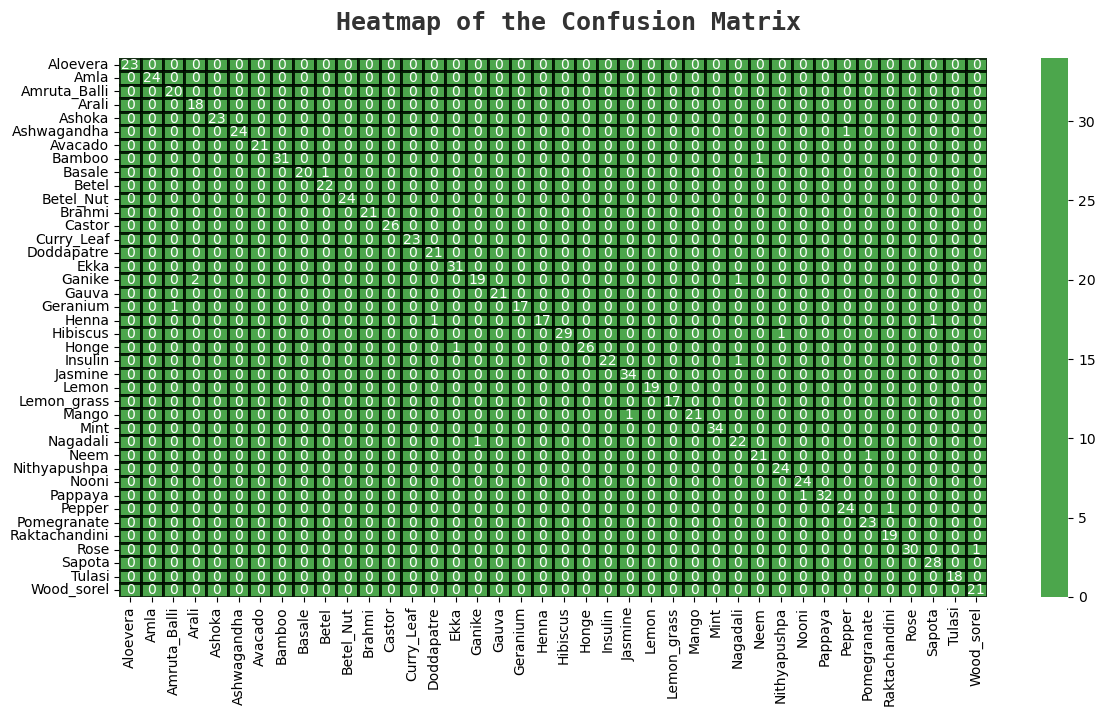

In [22]:
colors_green = ['green']  # Replace with your color definitions
linecolor = 'black'

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
conf_matrix = confusion_matrix(y_test_new, pred)

sns.heatmap(conf_matrix, ax=ax, xticklabels=labels, yticklabels=labels, annot=True,
            cmap=colors_green[::-1], alpha=0.7, linewidths=2, linecolor=linecolor)
fig.text(s='Heatmap of the Confusion Matrix', size=18, fontweight='bold',
         fontname='monospace', color=linecolor, y=0.92, x=0.28, alpha=0.8)

plt.show()

In [23]:
print(labels)

['Aloevera', 'Amla', 'Amruta_Balli', 'Arali', 'Ashoka', 'Ashwagandha', 'Avacado', 'Bamboo', 'Basale', 'Betel', 'Betel_Nut', 'Brahmi', 'Castor', 'Curry_Leaf', 'Doddapatre', 'Ekka', 'Ganike', 'Gauva', 'Geranium', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jasmine', 'Lemon', 'Lemon_grass', 'Mango', 'Mint', 'Nagadali', 'Neem', 'Nithyapushpa', 'Nooni', 'Pappaya', 'Pepper', 'Pomegranate', 'Raktachandini', 'Rose', 'Sapota', 'Tulasi', 'Wood_sorel']


In [24]:
import tensorflow as tf

# Load the pre-trained EfficientNetB0 model
model = tf.keras.applications.EfficientNetB0(weights='imagenet')

In [25]:
import tensorflow as tf

# Get the train, validation, and test data location
train_data_location = '/path/to/data/train/'
validation_data_location = '/path/to/data/validation/'
test_data_location = '/path/to/data/test/'

In [29]:
image_width=224

100%|██████████| 40/40 [00:00<?, ?it/s]


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Ashwagandha
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted leaf class: Ashwagandha
Percentage of prediction: 87.53305673599243


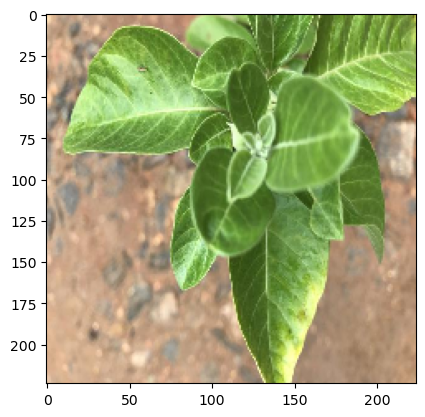

In [37]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image

# Function to load and preprocess an image from a local file
def load_and_preprocess_image(path, img_width,img_height):
    img = Image.open(image_path)
    img = img.resize((img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img, img_array

labels = []
for lab in tqdm(os.listdir(path)):
    labels.append(lab)

# Load the trained model using TensorFlow/Keras
loaded_model = load_model("C://Users//Srivalli Sana//DEEP LEARNING FOR IMAGE ANALYTICS//planteffnet.keras")

# Define the local file path to the image you want to test
image_path = r'D://Medicinal plant dataset//Ashwagandha//2192.jpg'
# Define the dimensions of your input images (match your model's input size)
img_width, img_height = 224,224

# Load and preprocess the test image
#input_img, img_array = load_and_preprocess_image(image_path, img_width, img_height)
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)


# Make predictions using the loaded model
predictions = loaded_model.predict(img_array)

print(labels[np.argmax(predictions)])
plt.imshow(img)

# Load and preprocess the image.
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Make predictions using the loaded model.
predictions = loaded_model.predict(img_array)

# Select the disease class with the highest probability.
predicted_class = labels[np.argmax(predictions)]

# Calculate the percentage of disease.
leaf_percentage = predictions[0][np.argmax(predictions)] * 100

# Print the results.
print("Predicted leaf class:", predicted_class)
print("Percentage of prediction:", leaf_percentage)